In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
# Assuming 'actual_prices' and 'predicted_prices' are your arrays or Series.
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, color='blue')
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

NameError: name 'actual_prices' is not defined

<Figure size 1000x600 with 0 Axes>

In [4]:
data = pd.read_csv('train.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Example: Filling missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Example: Encoding categorical variables
data = pd.get_dummies(data, columns=['categorical_column'])

# You may need to perform other preprocessing steps depending on your specific dataset.


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [7]:
# Assuming 'data' is your DataFrame
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [8]:
# Assuming 'data' is your DataFrame and 'categorical_columns' is a list of categorical column names
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [9]:
# Split data into features (X) and target (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X, y)


RandomForestRegressor()

In [11]:
predicted_prices_rf = rf_model.predict(X)


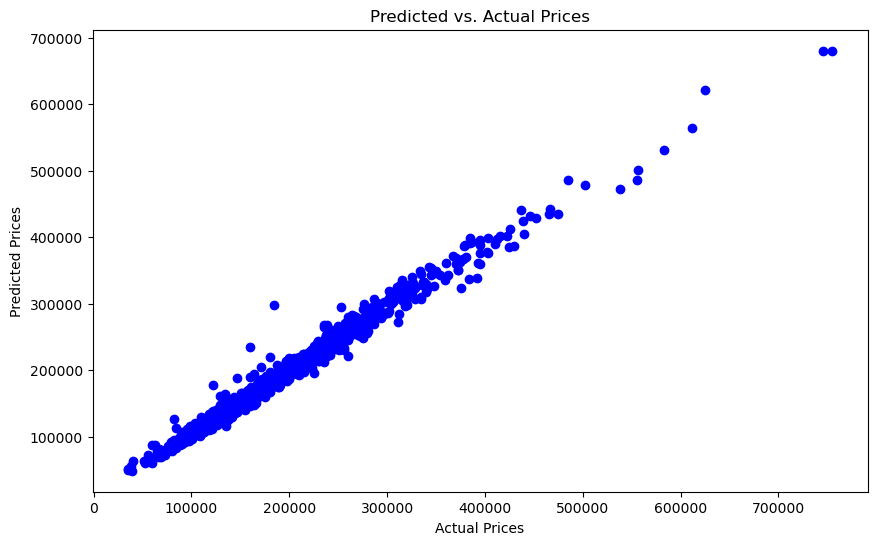

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_prices_rf, color='blue')
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


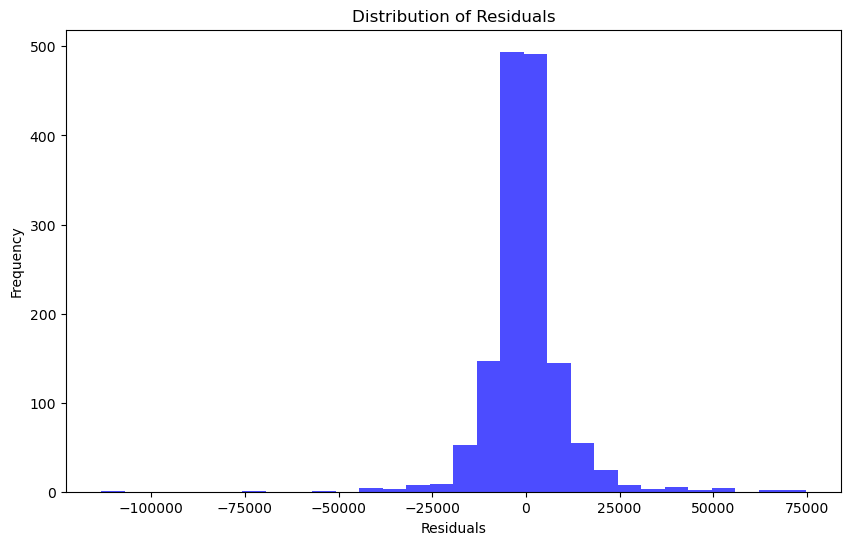

In [13]:
residuals_rf = y - predicted_prices_rf

plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
